# Homework assignment 3
Return this notebook (filled with your answers) by the deadline via mycourses.  Also provide pdf printout of the notebook.

Note that the notebook that you submit needs to work, that is, if running it produces errors, then that may result in reduction of points.

The first two questions related to lecture notes by Prof. Ollila and the last two questions to lecture notes by Prof. Vorobyov. 

_My name_: Bernard Spiegl<br>
_My student number_: 1023112

In [1]:
import pandas as pd
from sklearn import linear_model as LM

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

***

##  Question 1: look at the data (basic operations)  
**6P. (each sub problem is worth 1 P.)** <br>
Load the data in _prostate.txt_ to your workspace. You can consult the file _prostate.info.txt_ for description of  the data set. 

In [3]:
data_table = pd.read_csv('prostate.txt', sep='\t')
predictors=list(data_table.columns[1:-2])
data_table = data_table.iloc[:, 1:]
data_table

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


### 1 a)
Make a  scatterplot matrix of the prostate cancer variables,  where the first row shows the response against each of the predictors in turn. (Note especially that two of the predictors are categorical (namely, _gleason_ and _svi_). <br>
**Hint:** you should get the same picture that  is depicted in Figure 1.1., page 3,  of  Hastie et al. (2009). 

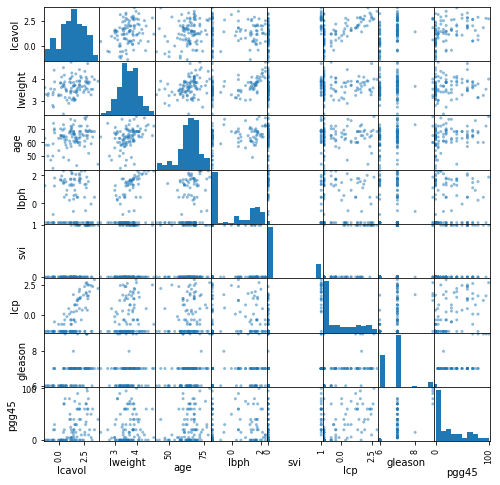

In [4]:
plot = pd.plotting.scatter_matrix(data_table[predictors])

### 1 b)
Center  and standardize all predictors to have mean zero and unit sample variance

In [5]:
numeric_df = data_table.select_dtypes(include="number")
numeric_df.loc[:, predictors] = (numeric_df[predictors] - numeric_df[predictors].mean()) / numeric_df[predictors].std()

/opt/software/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


### 1 c) 
Split data into the training and test sets, according to the labels in the last column in _prostate.txt_.

In [6]:
train_df = numeric_df[data_table.train == "T"]
test_df = numeric_df[data_table.train == "F"]

### 1 d)
* Fit a LS linear regression (with intercept) on the training set. Report the estimated regression coefficients
* Plot the residuals versus observation number. <br>  

**Hint:** you should get exactly the same results as given in Table 3.2, page 50, of Hastie et al., (2009) and shown below

<img style="width:700px" src="ESLII_table3dot2.png">

In [7]:
ls_regression = LM.LinearRegression().fit(train_df[predictors], train_df["lpsa"])
cdf = pd.DataFrame([ls_regression.intercept_] + ls_regression.coef_.tolist(), ["Intercept"] + predictors, columns=['Coefficients'])
cdf

,Coefficients
Intercept,2.464933
lcavol,0.679528
lweight,0.263053
age,-0.141465
lbph,0.210147
svi,0.305201
lcp,-0.288493
gleason,-0.021305
pgg45,0.266956


In [8]:
print(numeric_df["lpsa"])

0    -0.430783
1    -0.162519
2    -0.162519
3    -0.162519
4     0.371564
        ...   
92    4.385147
93    4.684443
94    5.143124
95    5.477509
96    5.582932
Name: lpsa, Length: 97, dtype: float64


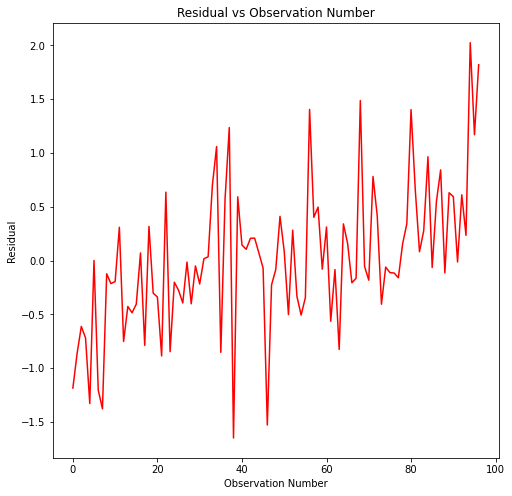

In [9]:
plt.plot(numeric_df["lpsa"] - ls_regression.predict(numeric_df[predictors]), "r")
plt.xlabel("Observation Number")
plt.ylabel("Residual")
plt.title("Residual vs Observation Number")
plt.show()

### 1 e)
Compute the prediction error on the test set, where PE is defined as 
$$ \mbox{PE} = \frac{1}{N_{test}} \sum_{i \in I_{test}} (y_i - \hat y_i)^2.$$
where  $ I_{test}$ denotes the indices in the test set.  You should obtain PE$= 0.5213$. 

In [10]:
y_pred = ls_regression.predict(test_df[predictors])
y_true = test_df["lpsa"]
pe = 1 / len(y_pred) * np.sum((y_true - y_pred) @ (y_true - y_pred).T)
print(f"Prediction Error: {pe:.4f}")

Prediction Error: 0.5213


### 1 f)
* Compute and report the correlation matrix of predictors variables in the training set.
* Identify the largest correlation between the predictors and report it in the form: <br>
<code>max correlation (3 decimal accuracy) is  XXX  between predictors  XXX and  XXX.</code>
<br>

**Hint:** you should get the same value as in Table 3.1 of Hastie et al (2009) and shown below:

<img style="width:600px" src="ESLII_table3dot1.png">

In [11]:
corr_matrix = train_df[predictors].corr()
corr_matrix

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


In [12]:
max_corr = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)[len(predictors):]
print(f"max correlation (3 decimal accuracy) is {max_corr[0]:.3f} between predictors {' and '.join(pd.DataFrame(max_corr).index.values[0])}.")

max correlation (3 decimal accuracy) is 0.757 between predictors pgg45 and gleason.


<hr/>

## Question 2: Cyclic Coordinate Descent (CCD) for LASSO
Read lecture notes discussing the cyclic coordinate descent algorithm in section 5.5 (Esa's lecture notes). <br>
a ) is worth 3P., b) is worth 2P. and c) is worth 1P. 

### 2 a) 
Implement the basic CCD algorithm (ccdlasso) described in *Algorithm 5.2* by yourself by writing a function named <code>ccdlasso</code> below.  Recall that this algorithm assumes that the predictors are standardized. 

The soft-thresholding function can be computed using  <code>threshold</code> in python (available in <code>pywt</code> module. Note, however, that computing the soft-thresholding function requires one (or two) lines of code, so you may consider just writing your own function.  

In [13]:
def threshold(x, lam):
    x = x[0]
    return max(np.sign(x) * np.abs(x) - lam, 0)

def ccdlasso(X, y, lam, delta=1e-4, max_iter=10000):
    y = np.expand_dims(y, 1)
    b_init = np.zeros((X.shape[1], 1))
    r_hat = y - X @ b_init
    b_old = np.copy(b_init)
    b_hat = np.copy(b_init)
    betas = np.zeros((max_iter, X.shape[1]))
    N = X.shape[0]
    for i in range(max_iter):
        for j in range(X.shape[1]):
            b_hat[j] = threshold(b_hat[j] + 1 / N * np.expand_dims(X[:, j], 1).T @ r_hat, lam)
            r_hat = r_hat + (b_old[j] - b_hat[j]) * np.expand_dims(X[:, j], 1)
        if np.linalg.norm(b_hat - b_old) / np.linalg.norm(b_hat) < delta:
            print(f"CCD Converged early at iteration {i}")
            break
        b_old = np.copy(b_hat)
        betas[i, :] = b_old.flatten()
    return b_hat.flatten(), betas, i

### 2 b) 
But did my code work? Recall the subgradient optimality conditions:  $\hat{\boldsymbol{\beta}}$ is the  Lasso solution iff
$$
 \frac{1}{N} \boldsymbol{x}_{j}^\top (\mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}})  = \begin{cases} 
 \lambda \mathrm{sign}(\hat \beta_j) , & \mbox{ if $\hat \beta_j \neq 0$} \\ 
 s_j , &  \mbox{ if $\hat \beta_j =0$} 
 \end{cases} ,
$$
where $ s_j$ is some number verifying $| s_j | \leq \lambda$, for $j=1,\ldots,p$. 

* First center both the response and predictor variables of the prostate cancer training data set you created in 1(c). 
* Then standardize the predictors. 
* Give this training data as inputs to <code>ccdlasso</code> function to find the solution $\hat{\boldsymbol{\beta}}(\lambda)$  with a penalty parameter value $\lambda=0.3$. The initial value of iteration <code>beta_init</code> can be a vector of zeros.
* Report this solution and verify that  the subgradient optimality condition (5.21)  holds for it.   <br>

**Note**: In other words, you are asked to perform Steps 1-3 of Algorithm 5.1. 

In [14]:
train_centered = train_df - train_df.mean()
s = train_centered[predictors].std().to_numpy()
train_centered.loc[:, predictors] = train_centered[predictors] / s
y0 = train_centered["lpsa"].to_numpy()
X0 = train_centered[predictors].to_numpy()
b_hat, _, _ = ccdlasso(X0, y0, 0.3)
print(b_hat)

CCD Converged early at iteration 8
[0.52444907 0.11756675 0.         0.         0.03581075 0.
 0.         0.        ]


_Note_: You can verify that your ccdlasso function works by checking that  it returns the same value as the following code:

In [15]:
# y0 and X0 are the (centered, standardized) inputs of ccdlasso
regLasso0 = LM.Lasso(fit_intercept=False,alpha=0.3,normalize=False).fit(X0, y0)
beta_star = regLasso0.coef_
print(beta_star)

[0.5244446  0.11756692 0.         0.         0.03581366 0.
 0.         0.        ]


### 2c) 
Then transform the obtained estimate to original scale and compute the intercept, i.e., apply steps 4 and 5 of *Algorithm 5.1*. Report the obtained values  $\hat{\beta}(\lambda)$ and  $\hat{\beta}_0(\lambda)$ (where $\lambda=0.3$). 
Note that these correspond to solutions of the Lasso objective function for the original training data $\mathbf{y}$ and $\mathbf{X}$. Compare the found Lasso solution with the LSE solution you computed in question 1(d). 

In [16]:
beta_scaled = b_hat / s
intercept = np.mean(y0) - np.mean(X0, axis=0).T @ beta_scaled
print(beta_scaled)
print(intercept)

[0.49745172 0.10567947 0.         0.         0.03529965 0.
 0.         0.        ]
-7.188584879905155e-16


**Note:** your result should match with the output obtained using the code below. Note that scaling of the penalty parameter is due to different normalization of the predictors used by scikit-learn. Your <code>ccdlasso</code> uses standardization $\| \mathbf{x}_j \|^2=N$ but <code>LM.Lasso</code> uses  $\| \mathbf{x}_j \|^2=1$.

In [17]:
N = X0.shape[0]
regLasso = LM.Lasso(fit_intercept=True,alpha=0.3/np.sqrt(N),normalize=True).fit(X0, y0)
print(regLasso.coef_)
print(regLasso.intercept_)

[0.52535656 0.11931669 0.         0.         0.03723738 0.
 0.         0.        ]
-7.171972215371946e-16


***

## Question 3: Proximal Gradient Algorithm (PGA) for LASSO

### 3a)
Implement Proximal Gradient Algorithm for the Lasso problem (see Lecture notes by prof. Vorobyov, pp. 22 and 31)  by yourself by writing a function named <code>pgalasso</code>. 

In [18]:
def plot_desc(betas, conv_iter, title, beta_star=beta_star):
    beta_star = np.expand_dims(beta_star, 1)
    conv = np.log(np.linalg.norm(betas.T - beta_star, ord=2, axis=0))[:conv_iter]
    plt.xlabel("Iteration")
    plt.ylabel("log||beta_k - beta*||")
    plt.title(title)
    plt.plot(range(conv_iter), conv)
    plt.show()

In [19]:
import pywt

def pgalasso(X, y, lam, delta=1e-4, max_iter=200000):
    y = np.expand_dims(y, 1)
    L = np.max(np.linalg.eigvals(X.T @ X))
    N = X.shape[0]
    alpha = 1 / L
    alpha = alpha / N
    b_hat = np.zeros((X.shape[1], 1))
    betas = np.zeros((max_iter, X.shape[1]))
    for i in range(max_iter):
        b_hat = pywt.threshold(b_hat - alpha / N * X.T @ (X @ b_hat - y), alpha * lam)
        betas[i, :] = b_hat.flatten()
        if i > 0 and np.linalg.norm(b_hat.T - betas[i-1, :]) / np.linalg.norm(b_hat) <= delta:
            print(f"PGA Converged early at iteration {i}")
            break
    return b_hat.flatten(), betas, i

### 3 b) 
Use the same data set as in question 2b). Show the convergence graphs (as in Assignment 1) for both PGA and CCD and compare. 

Use the value <code>beta_star</code> (obtained in Note of question 2b)  as the true optimum $\boldsymbol{\beta}^*$ of the Lasso objective function.  

In [20]:
b_hat_pga, betas_pga, pga_iter = pgalasso(X0, y0, 0.3)
b_hat_ccd, betas_ccd, ccd_iter = ccdlasso(X0, y0, 0.3)

PGA Converged early at iteration 6392
CCD Converged early at iteration 8


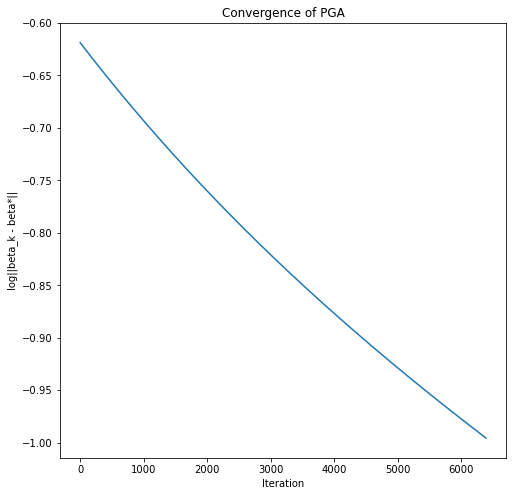

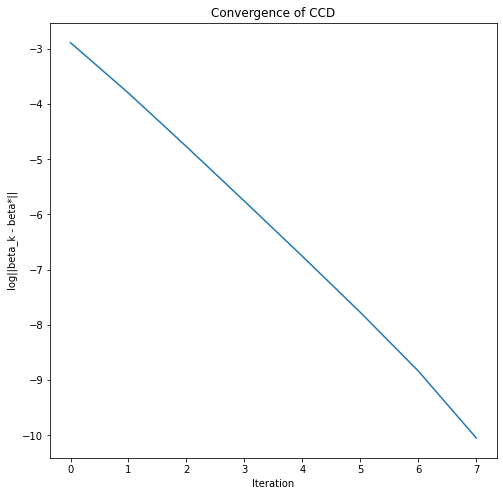

In [21]:
plot_desc(betas_pga, pga_iter, "Convergence of PGA")
plot_desc(betas_ccd, ccd_iter, "Convergence of CCD")

We see that it takes longer for PGA approach to converge in comparison to CCD which converges significantly faster. <br>
By lowering convergence criterion delta, we can see that even though PGA converges slower than CCD it keeps converging.

PGA Converged early at iteration 199445


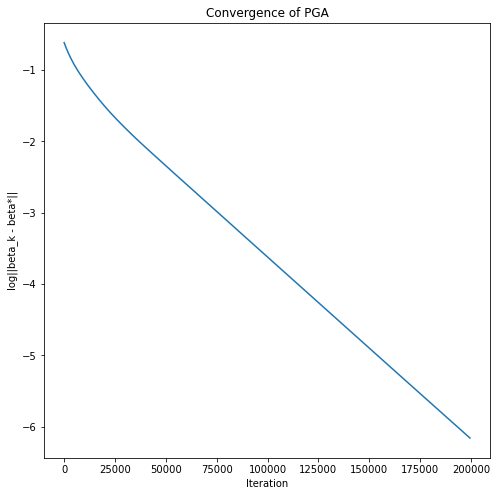

In [22]:
b_hat_pga, betas_pga, pga_iter = pgalasso(X0, y0, 0.3, delta=1e-7)
plot_desc(betas_pga, pga_iter, "Convergence of PGA")

***

## Question 4: Alternating Direction Method of Multipliers for LASSO
### 4 a)
Implement Alternating Direction Method of Multipliers for the Lasso problem (see Lecture notes by prof. Vorobyov,  pp. 26 and 32) by yourself by writing a function named <code>admmlasso</code>.  Use $\rho=1$ in the ADMM algorithm.  

In [23]:
def admmlasso(X, y, tau, rho=1, delta=1e-4, max_iter=10000):
    y = np.expand_dims(y, 1)
    betas = np.zeros((max_iter, X.shape[1]))
    z = np.zeros((X.shape[1], 1))
    N = X.shape[0]
    lam = np.zeros((X.shape[1], 1))
    for i in range(max_iter):
        b_hat = np.linalg.inv((X.T @ X + rho * np.identity(X.shape[1]))) @ (X.T @ y + rho * z - lam)
        z = pywt.threshold(b_hat + lam / rho, tau * N / rho)
        lam += rho * (b_hat - z)
        betas[i, :] = b_hat.flatten()
        if i > 0 and np.linalg.norm(b_hat.T - betas[i-1]) / np.linalg.norm(b_hat) <= delta:
            print(f"ADMM Converged early at iteration {i}")
            break
    return b_hat.flatten(), betas, i

### 4b)
Show the convergence graph of ADMM implementation and compare it to that of PGA and CCD from the previous problems.

ADMM Converged early at iteration 435


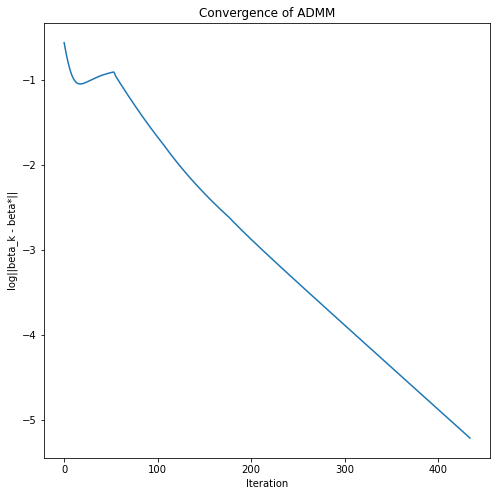

In [24]:
b_hat_admm, betas_admm, admm_iter = admmlasso(X0, y0, 0.3)
plot_desc(betas_admm, admm_iter, "Convergence of ADMM")

We can see that ADMM converges faster than PGA, but slower than CCD. It also surpasses the performance of PGA given our convergence criterion